# Transform the Processed Data back to Colorful Image
In this part, we transform the processed binary data into color image and compare it with the images processed by Rawpy to see if AHD algorithm works. <br>
Firstly, check shape of the processed data. Note that in the binary file, the image pixel is saved as img[ROW x WIDTH + COL][0], img[ROW x WIDTH + COL][1], img[ROW x WIDTH + COL][2], ...

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import rawpy
import imageio
from PIL import Image
import array
data = np.fromfile('./Demosaic_Data',dtype=np.uint16)
print("Type of binary file = ",type(data))
print("Type of data read from binary file = ",type(data[0]))
print("Shape of data stored in binary file = ",np.shape(data))
height = 5472
width = 7296
print("Desired data shape = ",height * width * 3)

Type of binary file =  <class 'numpy.ndarray'>
Type of data read from binary file =  <class 'numpy.uint16'>
Shape of data stored in binary file =  (119771136,)
Desired data shape =  119771136


It can be seen that the binary data has the shape that we expect. <br>
Then use **Rawpy** to process the RAW image. <br>
To evaluate the performance of AHD algorithm, we use both build-in **AHD** and **Linear** algorithms.

In [2]:
from rawpy import DemosaicAlgorithm
path = '/home/qingyao/Desktop/Topic 1: Demosaic/AHD Algorithm/7.dng'
raw = rawpy.imread(path)
rgb = raw.postprocess(demosaic_algorithm = DemosaicAlgorithm(0))
im = Image.fromarray(rgb)
im.save("RawPy_Demosaiced_Linear.jpeg")
raw = rawpy.imread(path)
rgb = raw.postprocess(demosaic_algorithm = DemosaicAlgorithm(3))
im = Image.fromarray(rgb)
im.save("RawPy_Demosaiced.jpeg")

After that, we transform the binary data into 8-bit color image. <br>
Note that three color channels are compensated by three mannually selected coefficients.

In [3]:
img = data.reshape((height,3*width))
image_rgb = np.zeros((height,width,3))
image_rgb[:,:,0] = img[:,::3] * 1.4 
image_rgb[:,:,1] = img[:,1::3] 
image_rgb[:,:,2] = img[:,2::3] * 1.2
image_rgb = image_rgb / 6
image_rgb = np.clip(image_rgb,0,255)
image_rgb = image_rgb.astype(np.uint8)
im = Image.fromarray(image_rgb)
im.save("Demosaiced_image.jpeg")

# Demosaicing Result

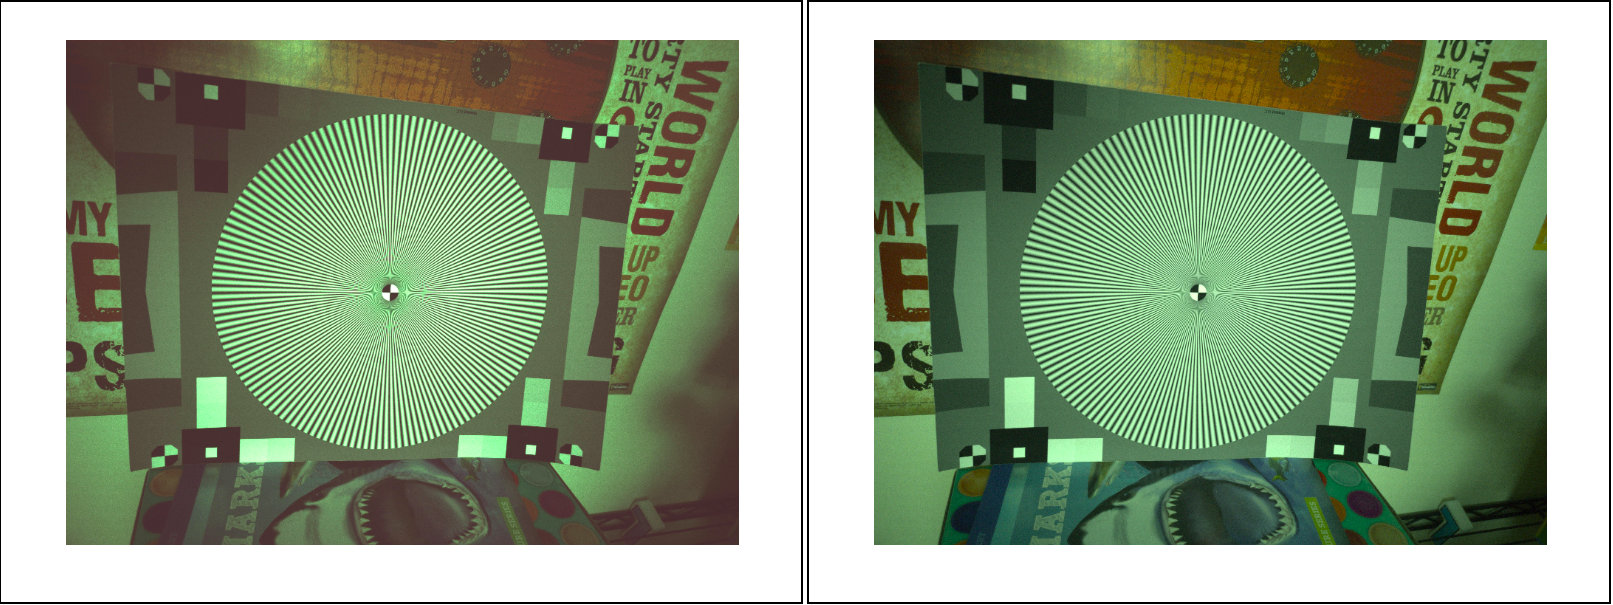
The left image is produced by **AHD.c** and the right one is produced by **Rawpy** also using **AHD** algorithms. <br>
Due to the unperfect coefficients selection, there is only slight color difference between two pictures. This could be fixed by choosing the proper coefficients.<br>
Beyond that, it can be found that there is no wrong color that being interpolated into the image. <br>
Then let's look at the details.


The left one is detail of diagonal lines of image produced by AHD.c while the right one is produced by Rawpy.<br>
It can be seen that both images show clear boundaries of lines and have no zipper-effect.<br>
Now, let's compare the details of image from AHD.c and Rawpy while using Linear algorithms.


The left one is from AHD.c and right one is processed by Linear algorithm.<br>
It is clear that despite of the brightness difference, the image processed by AHD algorithm shows more clearer details than Linear algorithm.<br>
The edges of image produced by Linear algorithm are blur no matter they are vertical, horizontal or diagonal.